In [62]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

# Searching for Images in the Folder

In [66]:
path = os.path.join(os.getcwd(), "Images")

images = os.listdir(path)
images.append("Exit Program")
print(images)
print(path)

['aerial.tif', 'cancer.tif', 'dawaat.jpg', 'einstein.tif', 'fft.tif', 'moon.tif', 'pollen.tif', 'spine.tif', 'Exit Program']
c:\Users\ahmed\OneDrive\Documents\University Data\7th Semester\Image Processing\Assignment\Assignment 2\Images


# Functions

In [77]:
def identity(img):
    image = os.path.join(path, img)
    image = io.imread(image)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")

    identity_matrix = np.eye(image.shape[1])

    resultant_image = image @ identity_matrix
    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap="gray")
    plt.title("Identity")

    plt.show()
    return


#######################################################################################


def negative(img):
    image = os.path.join(path, img)
    image = io.imread(image)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")

    max_pixel_val = np.max(image)
    max_possible_pixel = 0
    for i in range(1, 16):
        if max_pixel_val <= (2**i - 1):
            max_possible_pixel = 2**i - 1
            break

    rows, cols = len(image), len(image[0])

    resultant_image = None
    if image.ndim == 3:
        depth = len(image[0][0])
        resultant_image = np.zeros(shape=(rows, cols,  depth))
        for i in range(rows):
            for j in range(cols):
                for k in range(depth):
                    resultant_image[i][j][k] = int(
                        max_possible_pixel - image[i][j][k])
        resultant_image = resultant_image.astype(int)
    else:
        resultant_image = np.zeros(shape=(rows, cols))
        for i in range(rows):
            for j in range(cols):
                resultant_image[i][j] = int(max_possible_pixel - image[i][j])

    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap="gray")
    plt.title("Negative Image")
    plt.show()
    return


#######################################################################################


def threshold(img, cutoff_value, direction=1):
    image = os.path.join(path, img)
    image = io.imread(image)
    opposite = 0
    rows, cols = image.shape

    resultant_image = np.zeros(shape=(rows, cols))

    if direction == 0:
        opposite = 255
    else:
        direction = 255

    for i in range(rows):
        for j in range(cols):
            if image[i][j] > cutoff_value:
                resultant_image[i][j] = direction
            else:
                resultant_image[i][j] = opposite

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray", vmin = 0, vmax = 255)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap="gray", vmin = 0, vmax = 255)
    plt.title("Threshold Image")
    plt.show()
    return


#######################################################################################


def scale(img, multiplier):
    image = os.path.join(path, img)
    image = io.imread(image)

    rows, cols = image.shape
    resultant_image = np.zeros(shape=(rows, cols))
    for i in range(rows):
        for j in range(cols):
            resultant_image[i][j] = image[i][j] * multiplier

    resultant_image = resultant_image.astype(int)
    resultant_image = np.clip(resultant_image, 0, 255)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap="gray")
    plt.title("Scaled Image")
    plt.show()
    return


#######################################################################################


def logImage(img, base, constant):
    image = os.path.join(path, img)
    image = io.imread(image)

    rows, cols = image.shape
    resultant_image = np.zeros(shape=(rows, cols))
    for i in range(rows):
        for j in range(cols):
            if (base == 1):
                resultant_image[i][j] = constant * np.log2(1 + image[i][j])
            elif (base == 2):
                resultant_image[i][j] = constant * np.log10(1 + image[i][j])
            else:
                resultant_image[i][j] = constant * np.log(1 + image[i][j])

    resultant_image = resultant_image.astype(int)
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap = "gray")
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap = "gray")
    plt.title("Log Image")
    plt.show()
    return


#######################################################################################


def exponent(img, base, constant):
    image = os.path.join(path, img)
    image = io.imread(image)
    
    rows, cols = image.shape
    resultant_image = np.zeros(shape = (rows, cols)) 
    
    for i in range(rows):
        for j in range(cols):
            resultant_image[i][j] = np.clip((base - 1) * (image[i][j] ** constant), 0, 255)
                        
    resultant_image = resultant_image.astype(int)
    counts = np.bincount(resultant_image[0])
    count = counts[0]
    print(resultant_image.shape)
    print("Count: ", count)
    
        
    plt.subplot(1, 2 , 1)
    plt.imshow(image, cmap = "gray")
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap = "gray", vmin = 0, vmax = 255)
    plt.title("Exponent Transformed Image")
    plt.show()
    return

    
#######################################################################################


def power(img, power, constant):
    image = os.path.join(path, img)
    image = io.imread(image)
    
    rows, cols = image.shape
    resultant_image = np.zeros(shape = (rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            resultant_image[i][j] = constant * (image[i][j] ** power)
            
    resultant_image = resultant_image.astype(int)
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap = "gray", vmin = 0, vmax = 255)
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap = "gray", vmin = 0, vmax = 255)
    plt.title("Power Transformed Image")
    plt.show()
    return
    
#######################################################################################


def piecewiseTransform(img, anchors, functions):
    # Applying Image Clipping 
    
    image = os.path.join(path, img)
    image = io.imread(image)
    
    rows, cols = image.shape
    resultant_image = np.zeros(shape = (rows, cols))

    
    for i in range(rows):
        for j in range(cols):
            if image[i][j] < anchors[0]:
                resultant_image[i][j] = 0
            elif image[i][j] > anchors[1]:
                resultant_image[i][j] = 255
            else:
                resultant_image[i][j] = image[i][j]
                
    resultant_image = resultant_image.astype(int)
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap = "gray")
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap = "gray")
    plt.title("Clipped Image")
    plt.show()
    return


#######################################################################################


def gray_slice(img, slice_start, slice_end):
    image = os.path.join(path, img)
    image = io.imread(image)
    
    rows, cols = image.shape
    resultant_image = np.zeros(shape = (rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            if slice_start >= image[i][j] <= slice_end:
                resultant_image[i][j] = 255
            else:
                resultant_image[i][j] = 0
                
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap = "gray")
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(resultant_image, cmap = "gray")
    plt.title("Gray Slice Image")
    plt.show()
    return
    

## Menu

Choose from the following Images: 
1. aerial.tif
2. cancer.tif
3. dawaat.jpg
4. einstein.tif
5. fft.tif
6. moon.tif
7. pollen.tif
8. spine.tif
9. Exit Program
Choice is:  aerial.tif


Choose from the following Operations: 
1. Identity
2. Negation
3. Threshold
4. Scaling
5. Log
6. Exponent
7. Power
8. Piecewise Transform (Clipping)
9. Gray-Level Slicing


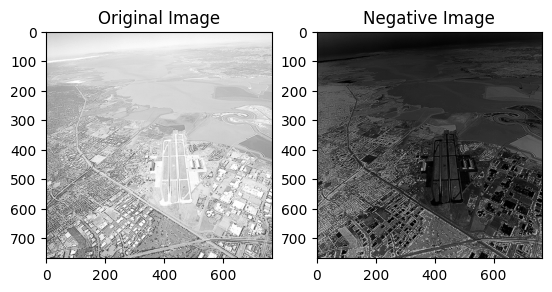

Choose from the following Images: 
1. aerial.tif
2. cancer.tif
3. dawaat.jpg
4. einstein.tif
5. fft.tif
6. moon.tif
7. pollen.tif
8. spine.tif
9. Exit Program


ValueError: invalid literal for int() with base 10: ''

In [80]:
cont = 1
operations = ["Identity", "Negation", "Threshold", "Scaling", "Log", "Exponent", "Power", "Piecewise Transform (Clipping)", "Gray-Level Slicing"]
piecewiseTransform_functions = ["Contrast Stretching", "Clipping", "Thresholding", "Gray-Level Slicing"]
while cont:
    print("Choose from the following Images: ")
    for i, j in enumerate(images):
        print(f"{i + 1}. {j}")
    choice = int(input("Enter Choice: "))
    if (choice >= 1 and choice <= 8):
        print("Choice is: ", images[choice - 1])

        print("\n\nChoose from the following Operations: ")
        for i, j in enumerate(operations):
            print(f"{i + 1}. {j}")
        oper_choice = 0
        while oper_choice < 1 or oper_choice > 9:
            oper_choice = int(input("Enter Operation: "))
            if (oper_choice < 1 or oper_choice > 9):
                print("Invalid Operation Choice!\n\n")
        
        if oper_choice == 1:
            identity(images[choice - 1])
            
        elif oper_choice == 2:
            negative(images[choice - 1])
        
        elif oper_choice == 3:
            thresh_val = float(input("Enter Threshold Value: "))
            direction = abs(int(input("Enter Directions ('0' for Inverse and '1' for Normal Direction): ")))
            while direction not in (0, 1):
                print("Invalid Choice")
                direction = abs(int(input("Enter Directions ('0' for Inverse and '1' for Normal Direction) again: ")))
            threshold(images[choice - 1], thresh_val, direction)
        
        elif oper_choice == 4:
            multiplier = abs(float(input("Enter Multiplier: ")))
            scale(images[choice - 1], multiplier)
        
        elif oper_choice == 5:
            print("\n\nEnter Logarithm type: \n1. Base 2 Logarithm\n2. Base 10 Logarithm\n3. Natural Logarithm")
            log_base = int(input("Please enter your choice: "))
            while log_base not in (1, 2, 3):
                print("Invalid Choice!")
                log_base = int(input("Please enter your choice again: "))
            const = float(input("Enter a Constant: "))
            logImage(images[choice - 1], log_base, const)
            
        elif oper_choice == 6: 
            base = abs(int(input("Enter Base Value: ")))
            const = abs(int(input("Enter Constant Value: ")))
            exponent(images[choice - 1], base, const)
        
        elif oper_choice == 7:
            p = abs(int(input("Enter Power: ")))
            const = abs(int(input("Enter Constant Value: ")))
            power(images[choice - 1], p, const)
        
        elif oper_choice == 8:
            piecewiseTransform(images[choice - 1], (35, 220), "clipping")
        
        elif oper_choice == 9:
            start = int(input("Enter Slice start: "))
            end = int(input("Enter Slice end: "))
            while(start > end):
                print("\n\nInvalid Input! Enter Values Again")
                start = abs(int(input("Enter Slice start: ")))
                end = abs(int(input("Enter Slice end: ")))
            gray_slice(images[choice - 1], start, end)  
    
    elif choice == 9:
        cont = 0
        print("\n\nExiting Program")
    
    else:
        os.system("cls")
        print("\n\nInvalid Choice\n\n")